In [1]:
from __future__ import print_function 
import os, sys, h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from six.moves import cPickle
from sklearn.metrics import roc_curve, auc, precision_recall_curve, accuracy_score, roc_auc_score

sys.path.append('..')
import helper
from deepomics import neuralnetwork as nn
from deepomics import utils, fit

In [6]:
models = ['affinity_residual_net', 'affinity_conv_net', 'affinity_all_conv_net']
normalize_method = 'log_norm' 
ss_type = 'seq'

# path where model parameters are saved
best_path = '../../results/RNAcompete_2009_new/'+normalize_method+'_'+ss_type


rbp_names = ['Fusip', 'HuR', 'PTB', 'RBM4', 'SF2', 'SLM2', 'U1A', 'VTS1', 'YB1']

data_path = '../../data/RNAcompete_2009/rnacompete2009.h5'
 
mean_predictions = []
rbp_index = 0
for rbp_index, rbp_name in enumerate(rbp_names):
    print(str(rbp_index) + '. '+ rbp_name)
    
    # load rbp dataset
    train, valid, test = helper.load_dataset_hdf5(data_path, dataset_name=rbp_name, ss_type=ss_type)

    # process rbp dataset
    train, valid, test = helper.process_data(train, valid, test, method=normalize_method)

    # get shapes
    input_shape = list(train['inputs'].shape)
    input_shape[0] = None
    output_shape = train['targets'].shape

    predictions = []
    for model in models:

        # load model
        genome_model = helper.import_model(model)
        model_layers, optimization = genome_model.model(input_shape, output_shape)

        # build neural network class
        nnmodel = nn.NeuralNet(seed=247)
        nnmodel.build_layers(model_layers, optimization, use_scope=True)

        file_path = os.path.join(best_path, model, rbp_name)
        nntrainer = nn.NeuralTrainer(nnmodel, save='best', file_path=file_path)

        # initialize session
        sess = utils.initialize_session(nnmodel.placeholders)

        # load best model
        nntrainer.set_best_parameters(sess, verbose=0)

        predictions.append(nntrainer.get_activations(sess, test))

    predictions = np.hstack(predictions)
    scores = []
    for i in range(3):
        score = np.corrcoef(predictions[:,i], test['targets'][:,0])[0,1]
        scores.append(score)
        print("\t%s:\t%.4f"%(models[i], score))
    
    mean_pred = np.mean(predictions,axis=1)
    mean_score = np.corrcoef(mean_pred, test['targets'][:,0])[0,1]
    scores.append(mean_score)
    print("\t\t\tmean:\t%.4f"%(mean_score)) 

    # store results
    mean_predictions.append(scores)

0. Fusip
	affinity_residual_net:	0.7274
	affinity_conv_net:	0.7136
	affinity_all_conv_net:	0.7085
			mean:	0.7438
1. HuR
	affinity_residual_net:	0.8147
	affinity_conv_net:	0.8101
	affinity_all_conv_net:	0.8097
			mean:	0.8274
2. PTB
	affinity_residual_net:	0.6003
	affinity_conv_net:	0.5913
	affinity_all_conv_net:	0.5720
			mean:	0.6053
3. RBM4
	affinity_residual_net:	0.8301
	affinity_conv_net:	0.8039
	affinity_all_conv_net:	0.8132
			mean:	0.8363
4. SF2
	affinity_residual_net:	0.7785
	affinity_conv_net:	0.7468
	affinity_all_conv_net:	0.7500
			mean:	0.7831
5. SLM2
	affinity_residual_net:	0.7000
	affinity_conv_net:	0.6837
	affinity_all_conv_net:	0.6790
			mean:	0.7074
6. U1A


InvalidArgumentError: Assign requires shapes of both tensors to match. lhs shape= [9,1,4,96] rhs shape= [10,1,4,96]
	 [[Node: save/Assign_2 = Assign[T=DT_FLOAT, _class=["loc:@conv1d_0/conv1d/Variable"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/gpu:0"](conv1d_0/conv1d/Variable, save/RestoreV2_2/_103)]]

Caused by op u'save/Assign_2', defined at:
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-9595d0a02844>", line 47, in <module>
    nntrainer.set_best_parameters(sess, verbose=0)
  File "../deepomics/neuralnetwork.py", line 466, in set_best_parameters
    self.nnmodel.load_model_parameters(sess, file_path, verbose=verbose)
  File "../deepomics/neuralnetwork.py", line 161, in load_model_parameters
    saver = tf.train.Saver()
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1051, in __init__
    self.build()
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1081, in build
    restore_sequentially=self._restore_sequentially)
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 675, in build
    restore_sequentially, reshape)
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 414, in _AddRestoreOps
    assign_ops.append(saveable.restore(tensors, shapes))
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 155, in restore
    self.op.get_shape().is_fully_defined())
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/ops/gen_state_ops.py", line 47, in assign
    use_locking=use_locking, name=name)
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Assign requires shapes of both tensors to match. lhs shape= [9,1,4,96] rhs shape= [10,1,4,96]
	 [[Node: save/Assign_2 = Assign[T=DT_FLOAT, _class=["loc:@conv1d_0/conv1d/Variable"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/gpu:0"](conv1d_0/conv1d/Variable, save/RestoreV2_2/_103)]]


In [7]:
mean_predictions = np.array(mean_predictions)
np.mean(mean_predictions, axis=0)

array([ 0.74185139,  0.72487472,  0.72208418,  0.75055438])

In [2]:
models = ['affinity_residual_net', 'affinity_conv_net', 'affinity_all_conv_net']
normalize_method = 'log_norm' 
ss_type = 'pu'

# path where model parameters are saved
best_path = '../../results/RNAcompete_2009_new/mixed_'+normalize_method+'_'+ss_type


rbp_names = ['Fusip', 'HuR', 'PTB', 'RBM4', 'SF2', 'SLM2', 'U1A', 'VTS1', 'YB1']

rbp_name = 'VTS1'

data_path = '../../data/RNAcompete_2009/rnacompete2009.h5'


# load rbp dataset
train, valid, test = helper.load_dataset_hdf5(data_path, dataset_name=rbp_name, ss_type=ss_type)

# process rbp dataset
train, valid, test = helper.process_data(train, valid, test, method=normalize_method)

# get shapes
input_shape = list(train['inputs'].shape)
input_shape[0] = None
output_shape = train['targets'].shape

ensemble_predictions, predictions = helper.ensemble_predictions(test, rbp_name, models, input_shape, output_shape, best_path, use_scope=True)
                            

In [18]:
models = ['affinity_residual_net', 'affinity_conv_net', 'affinity_all_conv_net']
normalize_method = 'log_norm' 
ss_type = 'pu'

# path where model parameters are saved
best_path = '../../results/RNAcompete_2009_new/mixed_'+normalize_method+'_'+ss_type


rbp_names = ['Fusip', 'HuR', 'PTB', 'RBM4', 'SF2', 'SLM2', 'U1A', 'VTS1', 'YB1']

rbp_name = 'VTS1'

data_path = '../../data/RNAcompete_2009/rnacompete2009.h5'


# load rbp dataset
train, valid, test = helper.load_dataset_hdf5(data_path, dataset_name=rbp_name, ss_type=ss_type)

# process rbp dataset
train, valid, test = helper.process_data(train, valid, test, method=normalize_method)

# get shapes
input_shape = list(train['inputs'].shape)
input_shape[0] = None
output_shape = train['targets'].shape

predictions = []
for model in models:

    # load model
    genome_model = helper.import_model(model)
    model_layers, optimization = genome_model.model(input_shape, output_shape)

    # build neural network class
    nnmodel = nn.NeuralNet(seed=247)
    nnmodel.build_layers(model_layers, optimization, use_scope=True)

    file_path = os.path.join(best_path, model, rbp_name)
    nntrainer = nn.NeuralTrainer(nnmodel, save='best', file_path=file_path)

    # initialize session
    sess = utils.initialize_session(nnmodel.placeholders)

    # load best model
    nntrainer.set_best_parameters(sess, verbose=0)

    predictions.append(nntrainer.get_activations(sess, test))

predictions = np.hstack(predictions)
for i in range(3):
    score = np.corrcoef(predictions[:,i], test['targets'][:,0])[0,1]
    print("\t%s:\t%.4f"%(models[i], score))

mean_pred = np.mean(predictions,axis=1)
mean_score = np.corrcoef(mean_pred, test['targets'][:,0])[0,1]
print("\t\t\tmean:\t%.4f"%(mean_score)) 

	affinity_residual_net:	0.8217
	affinity_conv_net:	0.6834
	affinity_all_conv_net:	0.7471
			mean:	0.7956


In [ ]:

# get shapes
input_shape = list(train['inputs'].shape)
input_shape[0] = None
output_shape = train['targets'].shape


In [48]:

def ensemble_saliency(models, best_path, rbp_name, params):

    guided_saliency = []
    for model in models:
        # load model
        genome_model = helper.import_model(model)

        # parameters for saliency analysis
        params['genome_model'] = genome_model.model
        params['model_path'] = os.path.join(best_path, model, rbp_name+'_best.ckpt')
                  
        # guided backprop saliency
        guided_saliency.append(saliency.guided_backprop(X, layer='output', class_index=0, params=params))

    for i in range(num_plots):
        for j in range(len(models)):
            MAX = np.max(guided_saliency[j][i])
            guided_saliency[j][i] = guided_saliency[j][i]/MAX
    guided_saliency = np.array(guided_saliency)
    mean_saliency = np.mean(guided_saliency, axis=0)
    return mean_saliency, guided_saliency



from deepomics import saliency, visualize
num_plots = 5
max_indices = np.argsort(mean_pred)[::-1]  
plot_range = range(0,num_plots)
plot_index = max_indices[plot_range]

X = test['inputs'][plot_index]

# parameters for saliency analysis
params = {'input_shape': input_shape, 
          'output_shape': output_shape, 
          'optimization': optimization,
          'use_scope': True,
         }
mean_saliency, guided_saliency = ensemble_saliency(models, best_path, rbp_name, params)


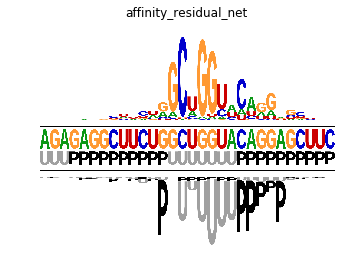

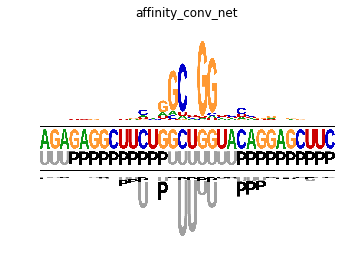

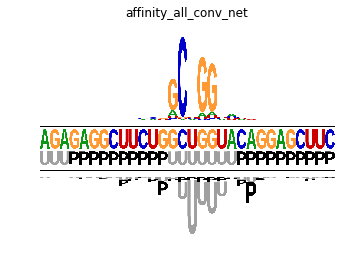

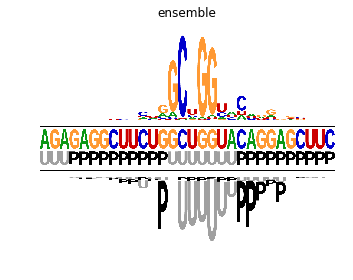

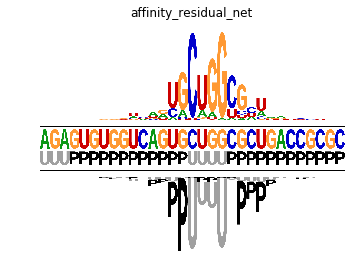

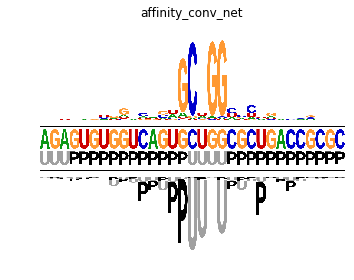

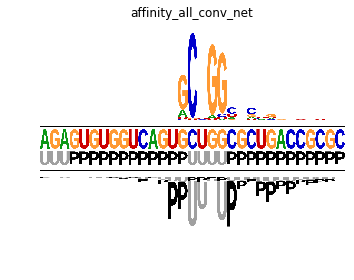

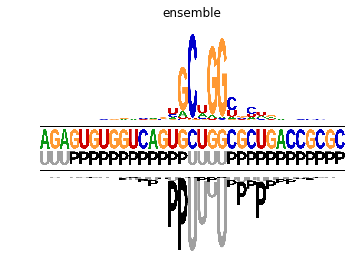

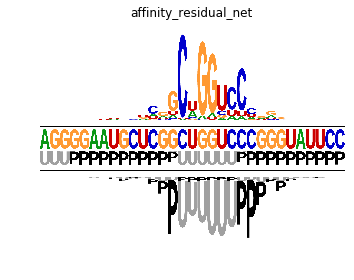

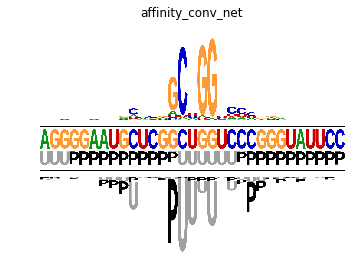

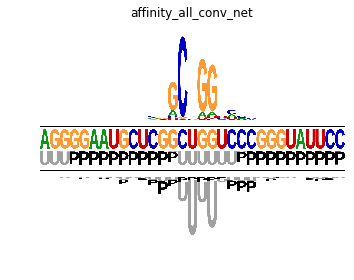

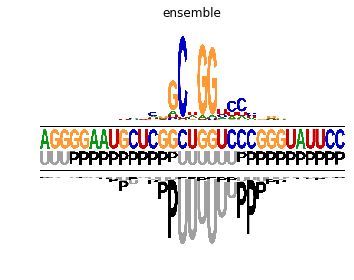

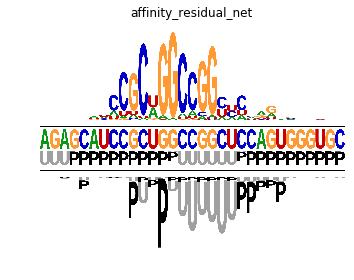

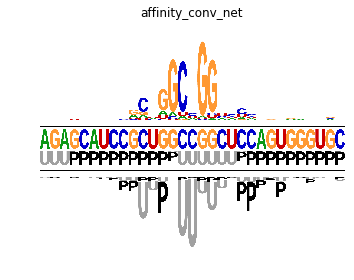

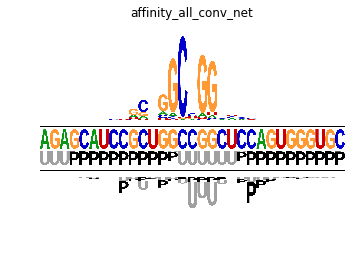

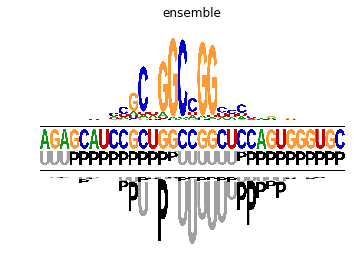

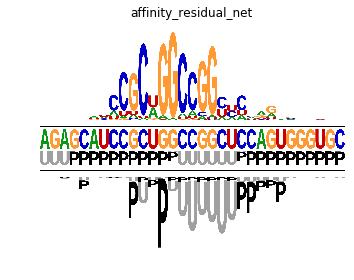

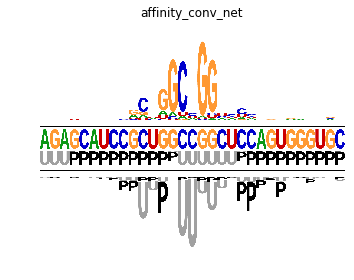

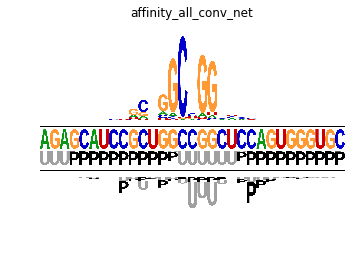

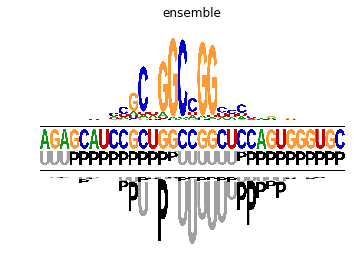

In [49]:
from deepomics import saliency, visualize
num_plots = 5
max_indices = np.argsort(mean_pred)[::-1]  
plot_range = range(0,num_plots)
plot_index = max_indices[plot_range]


for i in range(num_plots):
    if ss_type == 'seq':
        
        for j in range(3):
            fig = plt.figure()
            plt = visualize.plot_seq_pos_saliency(np.squeeze(X[i]).T, np.squeeze(guided_saliency[j][i]).T, alphabet='rna')
            plt.title(models[j])
        fig = plt.figure()
        plt = visualize.plot_seq_pos_saliency(np.squeeze(X[i]).T, np.squeeze(mean_saliency[i]).T, alphabet='rna')
        plt.title('ensemble')
        
    else:
        
        for j in range(3):
            fig = plt.figure()
            plt = visualize.plot_seq_struct_saliency(np.squeeze(X[i]).T, np.squeeze(guided_saliency[j][i]).T)
            plt.title(models[j])
        fig = plt.figure()
        plt = visualize.plot_seq_struct_saliency(np.squeeze(X[i]).T, np.squeeze(mean_saliency[i]).T)
        plt.title('ensemble')
        

In [ ]:
from deepomics import saliency, visualize
num_plots = 5
max_indices = np.argsort(mean_pred)[::-1]  
plot_range = range(0,num_plots)
plot_index = max_indices[plot_range]


for i in range(num_plots):

    X = np.expand_dims(test['inputs'][plot_index[i]], axis=0)

    guided_saliency = []
    for model in models:
        # load model
        genome_model = helper.import_model(model)

        # parameters for saliency analysis
        params = {'genome_model': genome_model.model, 
                  'input_shape': input_shape, 
                  'output_shape': output_shape, 
                  'model_path': os.path.join(best_path, model,rbp_name+'_best.ckpt'),
                  'optimization': optimization,
                  'use_scope': True,
                 }

        # guided backprop saliency
        guided_saliency.append(saliency.guided_backprop(X, layer='output', class_index=0, params=params))
    mean_saliency = np.mean(np.array(guided_saliency), axis=0)
    
    
    for j in range(3):
        fig = plt.figure()
        plt = visualize.plot_seq_pos_saliency(np.squeeze(X).T, np.squeeze(guided_saliency[j]).T, alphabet='rna')
        plt.title(models[j])
    fig = plt.figure()
    plt = visualize.plot_seq_pos_saliency(np.squeeze(X).T, np.squeeze(mean_saliency).T, alphabet='rna')
    plt.title('ensemble')